# Exercises

## Part A: Structure of the the philosopher network

First create graphs from philosopher files, using custom module to help load data.

In [1]:
import networkx as nx
import numpy as np
import re, json, urllib2, operator
import matplotlib.pyplot as plt
from __future__ import division
import community as cm
%matplotlib inline

# custom module used for philosopher files
import philosophers as ph

In [2]:
# use custom module to get unique list of all philosophers
unique_philosophers = ph.combined()

# pattern used to match links, only matches content before the piped character if present
# ex. Aristotle (philosopher) | Aristotle
pattern = r'\[\[([^|\[\]]*)\|?[^|\[\]]*\]\]';

# Create directed graph
directed_phil_network = nx.DiGraph()
# Add philosophers as nodes
directed_phil_network.add_nodes_from(unique_philosophers)

# store results of links to use later
content_map = {}

# file_load will return a tuple containing the name of the 
for data in ph.file_load():
    phil_node = data[0]
    content = data[1]
    # load content
    # retrieve all links found on page
    if content:  # can remove this if wikicontent function is modified
        all_links = re.findall(pattern, str(content.encode('utf8')))
        # find only links to other philosophers
        # convert lists to sets and perform an intersection between unique_philosophers and all_links 
        phil_links = set(all_links).intersection(set(unique_philosophers))
        
        # save philosopher as key and links as value
        content_map[phil_node] = phil_links
        
        # add edges
        ebunch = [(phil_node, phil) for phil in phil_links]
        directed_phil_network.add_edges_from(ebunch)

In [3]:
# Create undirected network from directed network
undirected_phil_network = nx.Graph(directed_phil_network)

### Structure of the the philosopher network

* Find the 5 most central philosophers according to betweenness centrality.

In [4]:
# sort dictionary by values and then create a new list with all values as tuples
def display_centrality(dct, N, name):
    values = sorted(dct.items(), key=operator.itemgetter(1), reverse=True)
    for ii in range(0,N):
        phil = values[ii]
        print "The %s has a %s of %s" % (phil[0],name,phil[1])

In [5]:
# calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(directed_phil_network)
# use helper function to quickly sort dict and print
display_centrality(betweenness_centrality, 5, 'betweenness_centrality')

The Immanuel Kant has a betweenness_centrality of 0.0528802042074
The Bertrand Russell has a betweenness_centrality of 0.0489202522102
The David Hume has a betweenness_centrality of 0.0351032151746
The Aristotle has a betweenness_centrality of 0.0345165550064
The Plato has a betweenness_centrality of 0.0322034809721


**What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?**

>Betweeness centrality measures how central a node is. Philosophers with a high betweenness centrality could have been very influential too other philosophers. One possibility is that the philosopher is a 'father' of a field or sub-field of philosophy.

* Find the 5 most central philosophers according to eigenvector centrality.

In [6]:
# similar procedure to the above
eigenvector_centrality = nx.eigenvector_centrality(directed_phil_network)
display_centrality(eigenvector_centrality, 5, 'eigenvector_centrality')

The Immanuel Kant has a eigenvector_centrality of 0.327487402645
The Aristotle has a eigenvector_centrality of 0.272857042391
The Bertrand Russell has a eigenvector_centrality of 0.255296229783
The Plato has a eigenvector_centrality of 0.219738602124
The Friedrich Nietzsche has a eigenvector_centrality of 0.210791001685


* Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).  

In [7]:
in_centrality = nx.in_degree_centrality(directed_phil_network)

print "In Centrality:"
display_centrality(in_centrality, 5, 'in_centrality')

out_centrality = nx.out_degree_centrality(directed_phil_network)

print "\nOut Centrality:"
display_centrality(out_centrality, 5, 'out_centrality')

In Centrality:
The Immanuel Kant has a in_centrality of 0.126470588235
The Aristotle has a in_centrality of 0.117647058824
The Plato has a in_centrality of 0.0852941176471
The Bertrand Russell has a in_centrality of 0.0833333333333
The Karl Marx has a in_centrality of 0.0794117647059

Out Centrality:
The Georg Wilhelm Friedrich Hegel has a out_centrality of 0.0441176470588
The Friedrich Nietzsche has a out_centrality of 0.0411764705882
The Immanuel Kant has a out_centrality of 0.0401960784314
The Bertrand Russell has a out_centrality of 0.0382352941176
The David Hume has a out_centrality of 0.0362745098039


**How is eigenvector centrality difference from degree centrality?**

>Degree centrality is a measure of the amount links a node has while eigenvector centraility is a measure of how important a node is. A large difference is that eigenvector centrality places more importance on what nodes that it is connected to while degree centrality is more concerned about the degree of its own node and the highest degree node. 

**Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?**

> 

* Is the undirected version of the graph assortative with respect do degree? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer?

In [8]:
assortativity = nx.degree_assortativity_coefficient(undirected_phil_network)
print assortativity

-0.0738046227169


> It appears that the philosopher network is slightly dissortative which is what we should expect. In general high-degree philosophers should tend to link with other high-degree philosophers and low-degree philosophers. Low-degree philosophers will tend to link with more popular philosophers and not low-degree philosophers.

### Age and structure in the philosopher network

* Create a histogram of the number of philosophers born in every century, starting 500 BC. 

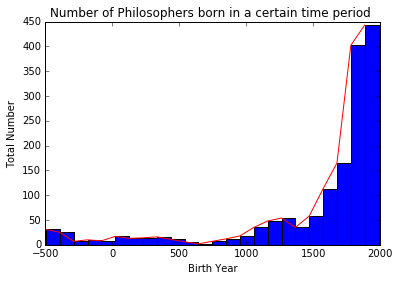

In [21]:
# read data from url and convert to python object
response = urllib2.urlopen('https://dl.dropboxusercontent.com/u/153071/02805/philosopher_birth_year.json')
data = json.loads(response.read())
birth_year = [v for v in data.values() if v >= -500]
bins = int((max(birth_year) + 500) / 100)
hist, bin_edges = np.histogram(birth_year,bins)

bin_dist = abs(bin_edges[1] - bin_edges[0])
plt.bar(bin_edges[:-1], hist, width = bin_dist)
plt.plot(bin_edges[:-1], hist, 'r')
plt.xlabel('Birth Year')
plt.ylabel('Total Number')
plt.title('Number of Philosophers born in a certain time period ')
plt.show()

**Describe the plot. Does philosophy seem to have developed at a steady pace - or in a more bursty manner? Are we living in a golden age of philosophy right now? (Use the data & common sense to present an argument for your answer).**

> The plot shows an almost exponential increase of philosophers. According the plot it seems Philosophy has seemed to develop at a rapid pace but when population growth is considered, that is not the case. I don't believe we are in a golden age of philosphy because if you consider the drastic increase of population the amount of philophers per capita is about the same as now and in 500 BC.

* Is the undirected version of the graph assortative with respect to age? 

In [27]:
# create subgraph with philosophers in philosopher_birth_year.json
directed_phil_age_network = directed_phil_network.subgraph(data.keys())
undirected_phil_age_network = nx.Graph(directed_phil_age_network)

# create new dict that contains only nodes in subgraph
age_dict = {}
for node in directed_phil_age_network.nodes():
    age_dict[node] = data[node]
    
# set age attribute to node
nx.set_node_attributes(directed_phil_age_network, 'age', age_dict)

undirected_phil_age_network = nx.Graph(directed_phil_age_network)
# calculate attribute assortativity
assortativity = nx.attribute_assortativity_coefficient(undirected_phil_age_network,'age')

print assortativity

-0.00216410275285


> Not assortive, could be the result of two effects counteracting each other. Old philosophers being more famous and referenced more could counteract with an overall increase of philosophers as the year increases.

* A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. 

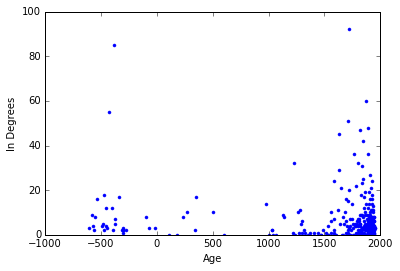

In [28]:
in_degrees = directed_phil_age_network.in_degree()

x = []
y = []
for phil,age in nx.get_node_attributes(directed_phil_age_network, 'age').iteritems():
    x.append(age)
    y.append(in_degrees[phil])
    
plt.plot(x,y,'.')
plt.xlabel('Age')
plt.ylabel('In Degrees')
plt.show()

** Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.) **

>

## Part B: The branches of philosophy. Are they communities?

### Modularity

**Explain the concept of modularity in your own words.**

> Modularity is the measure of difference between the fraction of all communities inside a network and the amount of links a community has if it was random. A higher modularity would correspond to a fewer then expected links between communities.

* Creating a set of six new branches, where we take all of the philosophers that belong to more than one branch and assign them to the branch that they have the most connections to. 

In [38]:
# use helper module to grab lists of philosophers and then convert them to sets
branches = list(map(set,ph.lists()))

# combine all the lists of philosophers into one list
all_philosophers = []
for lst in ph.lists():
    all_philosophers += lst

# create a list of philosophers that appear more then once
repeated_philosophers = []
for phil in unique_philosophers:
    # if the philosopher appears in more then one list, add it to the repeated philosophers list
    if all_philosophers.count(phil) > 1:
        repeated_philosophers.append(phil)
        # then remove the philosopher from all branches
        for branch in branches:
            if phil in branch:
                branch.remove(phil)
        
# for each philosopher that appeared more then twice
for phil in repeated_philosophers:
    # user the content_map to find the think the philospher has
    links = content_map[phil]
    
    target_branch = 0
    max_val = 0
    # then for every branch, calculate the amount of links
    for ii in range(0,len(branches)):
        branch = branches[ii]
        # calculate length of the intersection between the links and a branch
        val = len(links.intersection(branch))
        # check to see if the current branch has more links with the phil then the max branch
        if val > max_val:
            # save the index of the branch that has the most links
            target_branch = ii
            max_val = val
    # add the philosopher the branch it has the most links
    branches[target_branch].add(phil)

* Use equation 9.12 in the book to calculate the modularity M of the branches-partitioning.

In [39]:
# graph is the same as made previously

# number of communities
N = len(branches)

# total edges
L = undirected_phil_network.number_of_edges()

modularity = 0
for community in branches:
    total_degree = sum(undirected_phil_network.degree(community).values())
    
    # still contains links that could be outside the community
    num_links = undirected_phil_network.edges(community)
    
    # iterate through nodes in list of edges and remove links that leave the community
    for nodes in num_links:
        # if the first node or second node is not in the community remove that edge
        if nodes[0] not in community or nodes[1] not in community :
            num_links.remove(nodes)
            
    # calculate partial modularity
    modularity += len(num_links) / L - (total_degree / (2 * L)) ** 2
    
print "Modularity of the Philosopher Network is %s" % modularity

Modularity of the Philosopher Network is 0.695487371699


> The value of M is > 0 so the branches are good communities.

## Part C: Community detection in the full philosopher network.

### Community detection on the full philosopher network

* Use the Python Louvain-algorithm implementation to find communities in the full philosopher network. Report the value of modularity found by the algorithm. 

In [32]:
partition = cm.best_partition(undirected_phil_network)

modularity = cm.modularity(partition, undirected_phil_network)

print "Modularity of the Philosopher Network is %s using the Louvain-algorithm" % modularity

Modularity of the Philosopher Network is 0.463809808738 using the Louvain-algorithm


* Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?

> This is lower then found above for the branches as communities. This reveals that the branches are a good choice for communities.



Compare the communities found by your algorithm with the branches of philosophy by creating a matrix D with dimension (B times C), where B is the number of branches and C is the number of communities. We set entry D(i,j) to be the number of nodes that branch i has in common with community j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

In [66]:
prev_val = 0
partial_list = set([])
partitions = []
for phil in sorted(partition.items(), key=operator.itemgetter(1)):
    next_val = phil[1]
    if prev_val == next_val:
        partial_list.add(phil[0])
    else:
        prev_val = next_val
        partitions.append(partial_list)
        partial_list = set([])
        partial_list.add(phil[0])
        
# append last value 
partitions.append(partial_list)  

In [68]:
C = len(partitions)
B = len(branches)
D = np.zeros(shape=(B,C))
for ii in xrange(0,B):
    branch = branches[ii]
    for jj in xrange(0,C):
        community = partitions[jj]
        D[(ii,jj)] = len(branch.intersection(community))
        
print D
print np.trace(D)

[[ 22.  14.   0. ...,   0.   0.   0.]
 [  3.   8.   0. ...,   0.   0.   0.]
 [ 66.  51.   0. ...,   1.   1.   1.]
 [  5.  38.   1. ...,   0.   0.   0.]
 [  3.  16.   0. ...,   0.   0.   0.]
 [ 36.  15.   0. ...,   0.   0.   0.]]
39.0


In [64]:

print 

203
204
